<a href="https://colab.research.google.com/github/syp2889/python25study/blob/main/03_03_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# K-최근접 이웃 알고리즘의 한계에 대안>>>선형회귀
# 전에 학습한 K-최근접 이웃 회귀는 최대값에 대한 예측이 어려워요.

# 선형회귀 (linear: 리니어) 비교적 간단하고 성능이 뛰어나요.
# 선형이라는 말에서 짐작할 수 있듯이 직선을 학습하는 알고리즘이에요.

# 빨간선이 가로로 되어 있으면 대방어의 무게를 1개로 인식해요.
# 빨간선이 위에서 시작해서 아래로 떨어지면 반대로 예측해요.
# 빨간선이 아래에서 시작해서 위로 올라가면 정상적인 차트로 구현됩니다.

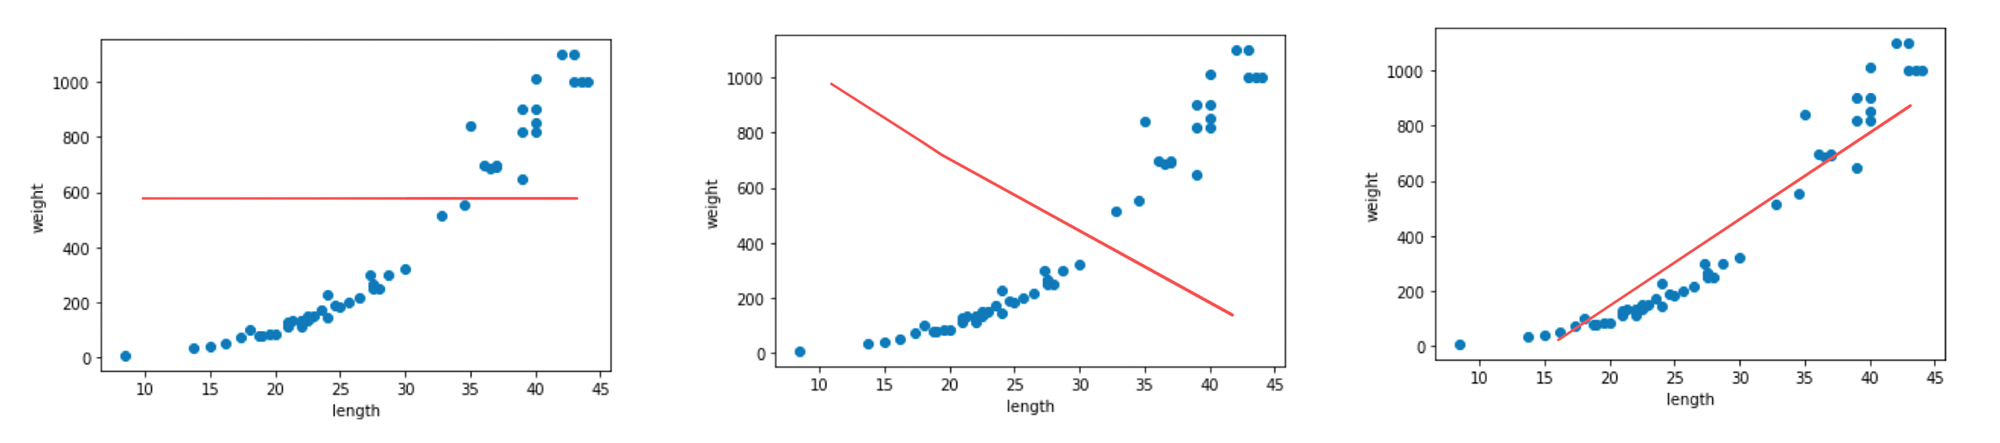

In [5]:
# 농어의 샘플자료 56개(대방어>농어)
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) # 대방어의 길이 배열리스트
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) # 대방어의 무게 배열리스트

In [9]:
# 사이킷런을 이용해서 훈련세트와 테스트 세트로 나눠요.

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 2차원 배열로 만들어야해요.
# -1 지정하면 원소 개수로 모두 채우라는 의미이고, 1은 두번 째 크기를 1로(특성)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input) # 농어의 길이(훈련용)
# 결과가 궁금하면 출력

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [10]:
print(test_input)  # 농어의 길이(테스트용)

[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [11]:
print(train_target) # 농어의 무게(훈련 정답용)

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [12]:
print(test_target) # 농어의 무게 (테스트 정답용)

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [16]:
# 사이킷런에서 제공한느 클래스를 사용해볼까요
from sklearn.linear_model import LinearRegression
# 선형 회귀용

lr = LinearRegression() # 선형 회귀용 객체 생성하여 변수에 연결
lr.fit(train_input, train_target) # 선형 회귀용으로 훈련 시작

LinearRegression()

In [17]:
print(lr.predict([[50]]))
# 농어의 무게 기울기+절편(y(s농어의 무게)) = a * x (농어의 길이)+ b)
# 직선의 방정식!!! 무게(1241.83g)로 예측

[1241.83860323]


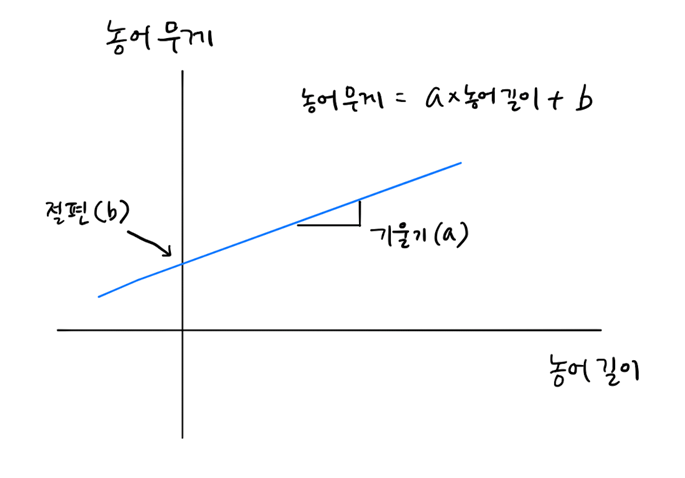

In [22]:
print(lr.coef_, lr.intercept_) # lr.coef_ 계수, lr.intercept_ 인터셉트
# 기울기를 종종 계수(coefficent), 가중치 (weight)라고도 부른다.

[39.01714496] -709.0186449535477


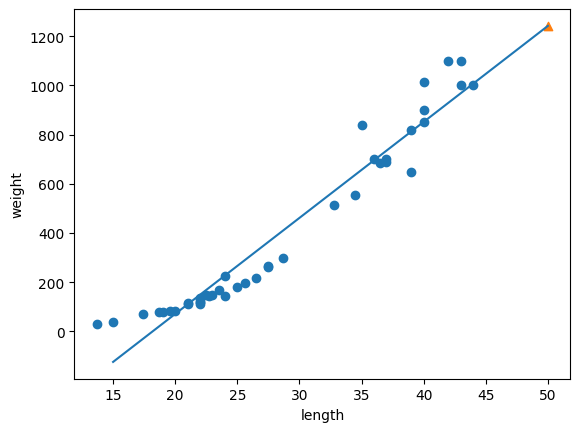

In [23]:
# 그래프로 확인 해보기

import matplotlib.pyplot as plt

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
# 직선차트 x축값            y축값[15*계수+인터셉트, 50*계수+인터셉트]
#             농어의 무게공식 = 기울기*농어의 길이 + 절편 (1차함수)

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
# 결론 예측은 가능한데 직선이라 값이 너무 직선적이다.
print(lr.score(train_input, train_target)) # 93.98%
print(lr.score(test_input, test_target))    # 82.47%
# 훈련세트가 테스트에 비해 높지만 차이가 많이 남으로 과소적합이라고 합니다. (5% 내외가 좋아요.)

0.939846333997604
0.8247503123313558


In [26]:
# 다항회귀(Polynomial Regression) 제곱을 활용해서 직선을 곡선으로 처리가 가능해요.

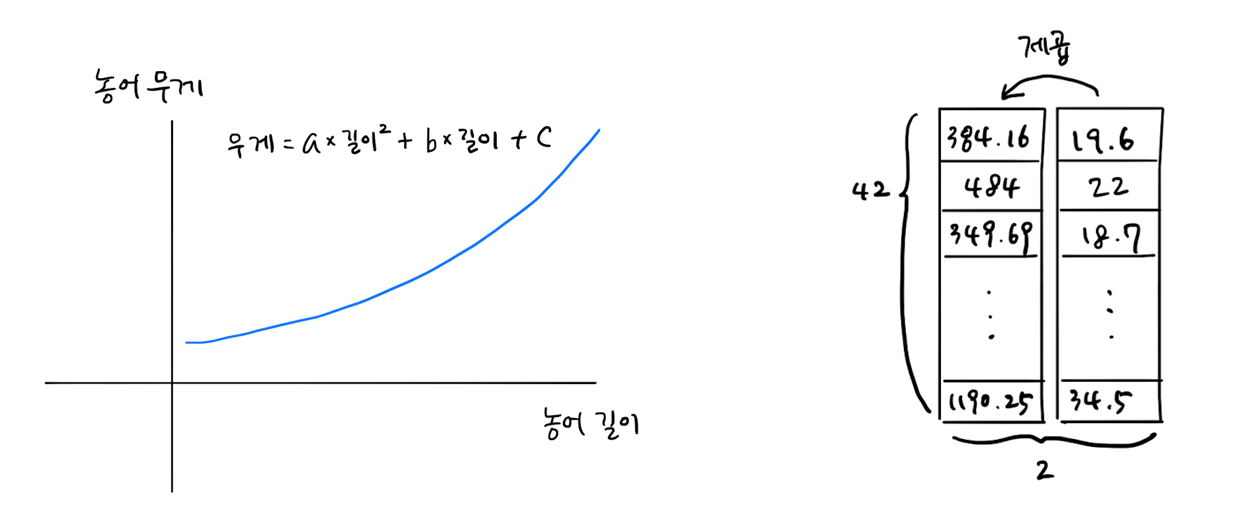

In [28]:
# 다항회귀는 2차원 방정식의 그래프로 그리려면
# 길이를 제곱한 항이 훈련세트에 추가되어야 하겠죠?

# 선형회귀의 문제점은 왼쪽 하단에 잇는 기준점이 불일치가 되는거에요
# >>그래서 곡선으로 만들어야 하죠.
train_poly =np.column_stack((train_input**2,train_input))
# 제곱한 것과 두 배열을 나란히 붙입니다.
test_poly =np.column_stack((test_input**2,test_input))
print(train_poly.shape, test_poly.shape)
# 2개의 특성이 만들어져요. (제곱값, 원본값)

(42, 2) (14, 2)


In [29]:
print(train_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [32]:
lr = LinearRegression()             # 선형회귀 객체 생성
lr.fit(train_poly, train_target)    # 훈련시작!

print(lr.predict([[50**2, 50]]))    # 결과 테스트
# 테스트 할 때  이 모델의 농어 길이의 제곱과 원래 길이를 함께 넣어요.
# 결과 50센티의 무게는 1573.98g로 나오네요.
# 직선형에서는 50센티의 무게는 1241.83으로 나온 것에 반해 말이에요.

[1573.98423528]


In [36]:
# 농어의 무게 기울기+절편
# (y(농어의 무게) = a * x(농어의 길이) + b)
print(lr.coef_, lr.intercept_) # lr.coef_ 계수, lr.intercept_ 인터셉트
# 1573.98 = 1.01        *       50**2     -21.55        * 50 + 116.05
# 무게    = lr.coef_[0] * 농어의 길이 **2 - lr.coef_[1] * 50 + lr.intercept_

[  1.01433211 -21.55792498] 116.0502107827827


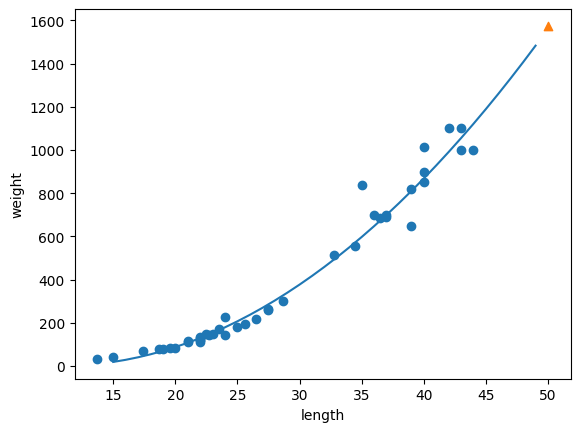

In [37]:
# 구간 별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다.
point = np.arange(15,50)
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 직선을 그립니다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05) # 다항회귀 공식 적용
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()